In [1]:
%load_ext autoreload
%autoreload 2

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import utils_plot as utils
from matplotlib import rc

mpl.style.use("ggplot")
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes

rc("text", usetex=True)
mpl.rcParams["text.latex.preamble"] = [r"\usepackage{amsmath}"]

import os
import re
import sys
import warnings

warnings.filterwarnings("ignore")

# Make layout

In [2]:
def set_layout():
    def _set_layout(_gs_master):
        _gs_master = GridSpecFromSubplotSpec(
            nrows=1,
            ncols=2,
            hspace=0.2,
            wspace=0.33,
            width_ratios=[1, 0.7],
            subplot_spec=_gs_master,
        )

        # time vs infected nodes
        gs = GridSpecFromSubplotSpec(
            nrows=3,
            ncols=1,
            subplot_spec=_gs_master[0, 0],
            height_ratios=[1, 0.6, 0.6],
            hspace=0.15,
        )
        ax_t_vs_i = fig.add_subplot(gs[0, 0])
        ax_t_vs_i_ct = fig.add_subplot(gs[1, 0])
        ax_t_vs_i_ps = fig.add_subplot(gs[2, 0])

        # Plots for isolated cases and prevented cases
        gs = GridSpecFromSubplotSpec(
            nrows=3, ncols=1, subplot_spec=_gs_master[:, 1], wspace=0.4, hspace=0.25
        )
        ax_ps_vs_i = fig.add_subplot(gs[0, 0])
        ax_ps_vs_p = fig.add_subplot(gs[1, 0])
        ax_ps_vs_e = fig.add_subplot(gs[2, 0])

        # Efficiency
        # gs_second = GridSpecFromSubplotSpec(nrows=1, ncols=1, subplot_spec=gs[1, 0])

        return (
            ax_t_vs_i,
            ax_t_vs_i_ct,
            ax_t_vs_i_ps,
            ax_ps_vs_i,
            ax_ps_vs_p,
            ax_ps_vs_e,
        )

    # fig = plt.figure(figsize=(16, 8.5))
    fig = plt.figure(figsize=(17, 12))

    gs_master = GridSpec(
        nrows=1,
        ncols=2,
        # height_ratios=[0.7, 1],
        width_ratios=[1, 1],
        hspace=0.3,
        wspace=0.15,
    )

    # time vs infected nodes
    axes = {}
    for i, name in enumerate(["int", "intb"]):
        (
            ax_t_vs_i,
            ax_t_vs_i_ct,
            ax_t_vs_i_ps,
            ax_ps_vs_i,
            ax_ps_vs_p,
            ax_ps_vs_e,
        ) = _set_layout(gs_master[:, i])

        axes[name] = {
            "t_vs_i": ax_t_vs_i,
            "t_vs_i_ct": ax_t_vs_i_ct,
            "t_vs_i_ps": ax_t_vs_i_ps,
            "ps_vs_i": ax_ps_vs_i,
            "ps_vs_p": ax_ps_vs_p,
            "ps_vs_e": ax_ps_vs_e,
        }

    #####################
    return fig, axes

# Data

In [3]:
data_table = {"int": {}, "intb": {}}
model = "seir"

data_table["int"]["time"] = pd.read_csv(
    "../../data/res-ba-cont/{model}/plot-data-time-vs-infected.csv".format(model=model),
    sep="\t",
)
data_table["int"]["ps"] = pd.read_csv(
    "../../data/res-ba-cont/{model}/plot-data-ps-vs-infected.csv".format(model=model),
    sep="\t",
)
data_table["intb"]["time"] = pd.read_csv(
    "../../data/res-intb-cont/{model}/plot-data-time-vs-infected.csv".format(
        model=model
    ),
    sep="\t",
)
data_table["intb"]["ps"] = pd.read_csv(
    "../../data/res-intb-cont/{model}/plot-data-ps-vs-infected.csv".format(model=model),
    sep="\t",
)

In [4]:
data_table["int"]["time"]["maxnode"].drop_duplicates()

0             20
2100          30
4200          50
6300    99999999
8400          10
Name: maxnode, dtype: int64

# Plot

In [5]:
# Parameters
plot_params = {
    "markersize": 8,
    # "ci": None,
    # "estimator": np.median,
    "err_kws": {"alpha": 0.4},
    "linewidth": 2.0,
}

maxnode_list = [10, 30, 99999999]
linestyles = {10: ":", 30: "--", 99999999: "-"}
label_font_size = 15


subcap_params = {
    "xycoords": "axes fraction",
    "ha": "left",
    "va": "top",
    "fontsize": 28,
    "weight": "bold",
}

rc("text", usetex=True)
sns.set(font_scale=1.4)
sns.set_style("white")
sns.set_style("ticks")

In [6]:
def test_plotter(plotter, ax):
    rc("text", usetex=True)
    sns.set(font_scale=1.4)
    sns.set_style("white")
    sns.set_style("ticks")

    # Set up the layout
    plotter(ax)
    sns.despine()

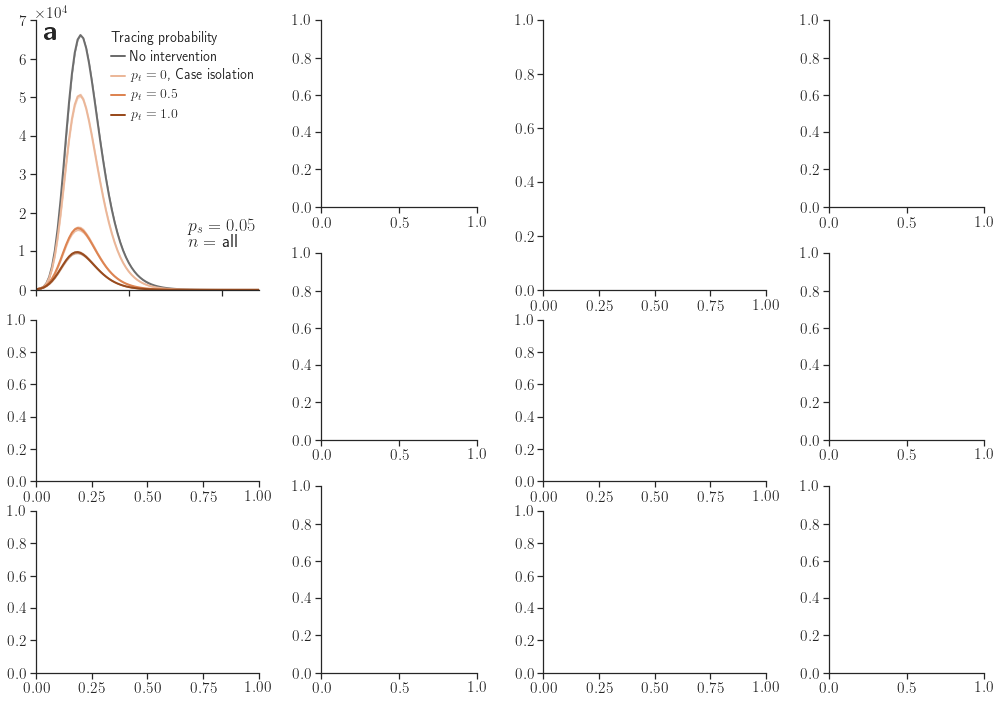

In [7]:
# Plot
def plot_a(ax):
    dtype = "int"
    utils.plot_time_vs_i(data_table[dtype]["time"], ax, plot_params, maxnode_list[-1])

    lines = ax.get_lines()
    leg = ax.legend(
        [lines[0]] + lines[1:],
        ["No intervention"]
        + [r"$p_t = 0$, Case isolation", "$p_t = 0.5$", "$p_t = 1.0$"],
        title="Tracing probability",
        frameon=False,
        loc="upper right",
        bbox_to_anchor=(1.03, 1.01),
        fontsize=14,
        handlelength=1,
        labelspacing=0.4,
        handletextpad=0.4,
    )
    leg.get_title().set_fontsize(14)
    leg._legend_box.align = "left"

    ax.set_xlabel("")
    ax.set_ylabel("", fontsize=label_font_size)
    ax.set_xlim(left=0, right=120)
    ax.set_ylim(0, 7e4)
    ax.set_xticklabels([])
    formatter = mticker.ScalarFormatter()
    formatter.set_powerlimits((-3, 2))
    ax.yaxis.set_major_formatter(formatter)
    ax.annotate(
        r"\noindent$p_s = 0.05$\\$n=$ all",
        xy=(0.98, 0.15),
        xycoords="axes fraction",
        ha="right",
        va="bottom",
        fontsize=18,
    )
    ylocs = ax.get_yticks()
    ax.annotate(r"\textbf{a}", xy=(0.03, 1.0), **subcap_params)


# Plot (a)
fig, axes = set_layout()
test_plotter(plot_a, axes["int"]["t_vs_i"])

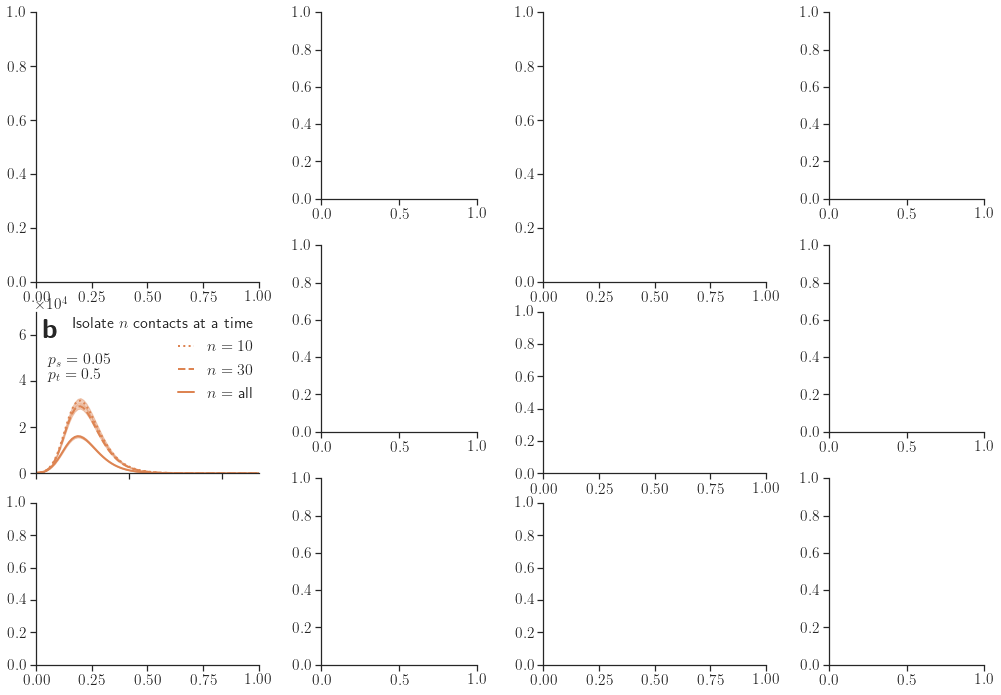

In [8]:
## Plot (b)
# Plot
def plot_b(ax):
    dtype = "int"
    utils.plot_time_vs_i_maxnode(
        data_table[dtype]["time"], ax, plot_params, maxnode_list, linestyles,
    )

    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels([])
    ax.legend(frameon=False, fontsize=13)
    ax.set_xlim(left=0, right=120)
    ax.set_ylim(0, 7e4)
    formatter = mticker.ScalarFormatter()
    formatter.set_powerlimits((-3, 2))
    ax.yaxis.set_major_formatter(formatter)
    # ax.set_ylim(bottom=0, top=axes["int"]["t_vs_i"].get_ylim()[1])
    leg = ax.legend(
        frameon=False,
        fontsize=16,
        title="Isolate $n$ contacts at a time",
        loc="upper right",
        bbox_to_anchor=(1.04, 1.06),
        handlelength=1,
    )
    leg._legend_box.align = "right"
    leg.get_title().set_fontsize(16)
    ax.annotate(
        r"\noindent$p_s = 0.05$\\$p_t = 0.5$",
        xy=(0.05, 0.55),
        xycoords="axes fraction",
        ha="left",
        va="bottom",
        fontsize=16,
    )
    ax.annotate(r"\textbf{b}", xy=(0.03, 0.96), **subcap_params)


fig, axes = set_layout()
test_plotter(plot_b, axes["int"]["t_vs_i_ct"])

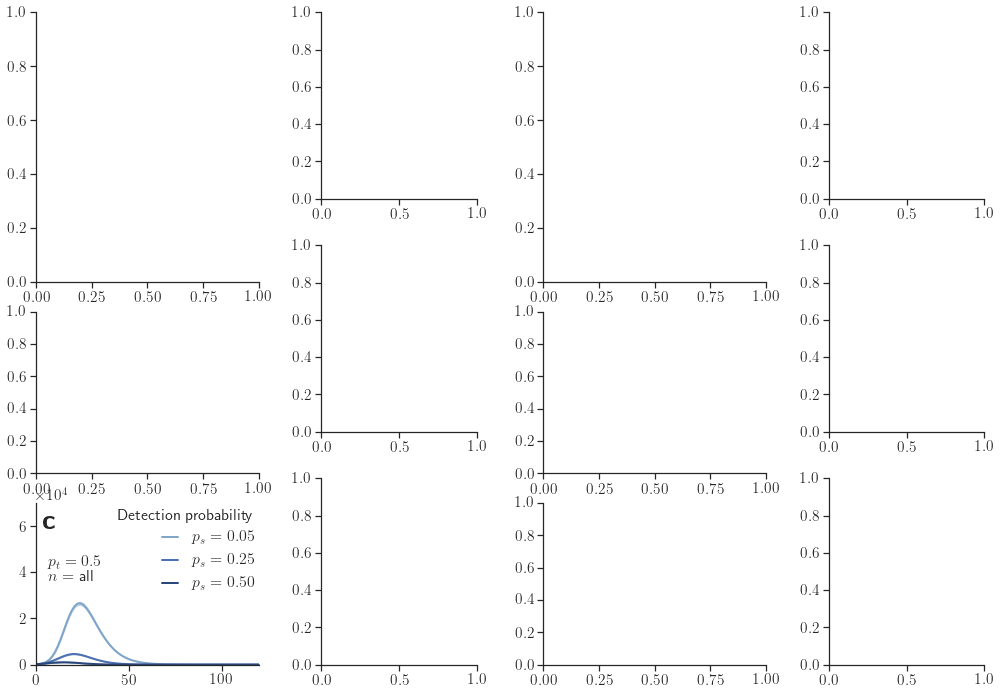

In [9]:
# Plot
def plot_c(ax):
    dtype = "int"

    utils.plot_time_vs_i_ps(
        data_table[dtype]["time"], ax, plot_params,
    )

    ax.set_xlabel("")
    ax.set_ylabel("")
    # ax.set_xlim(left=0, right=axes["int"]["t_vs_i"].get_xlim()[1])
    ax.legend(frameon=False, fontsize=13)
    formatter = mticker.ScalarFormatter()
    formatter.set_powerlimits((-3, 2))
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xlim(left=0, right=120)
    ax.set_ylim(0, 7e4)
    # ax.set_ylim(bottom=0, top=axes["int"]["t_vs_i"].get_ylim()[1])
    leg = ax.legend(
        frameon=False,
        fontsize=16,
        title="Detection probability",
        loc="upper right",
        handlelength=1,
        bbox_to_anchor=(1.04, 1.06),
    )
    leg._legend_box.align = "right"
    leg.get_title().set_fontsize(16)
    ax.annotate(
        r"\noindent $p_t = 0.5$\\$n=$ all",
        xy=(0.05, 0.5),
        xycoords="axes fraction",
        ha="left",
        va="bottom",
        fontsize=16,
    )
    ax.annotate(r"\textbf{c}", xy=(0.03, 0.96), **subcap_params)


fig, axes = set_layout()
test_plotter(plot_c, axes["int"]["t_vs_i_ps"])

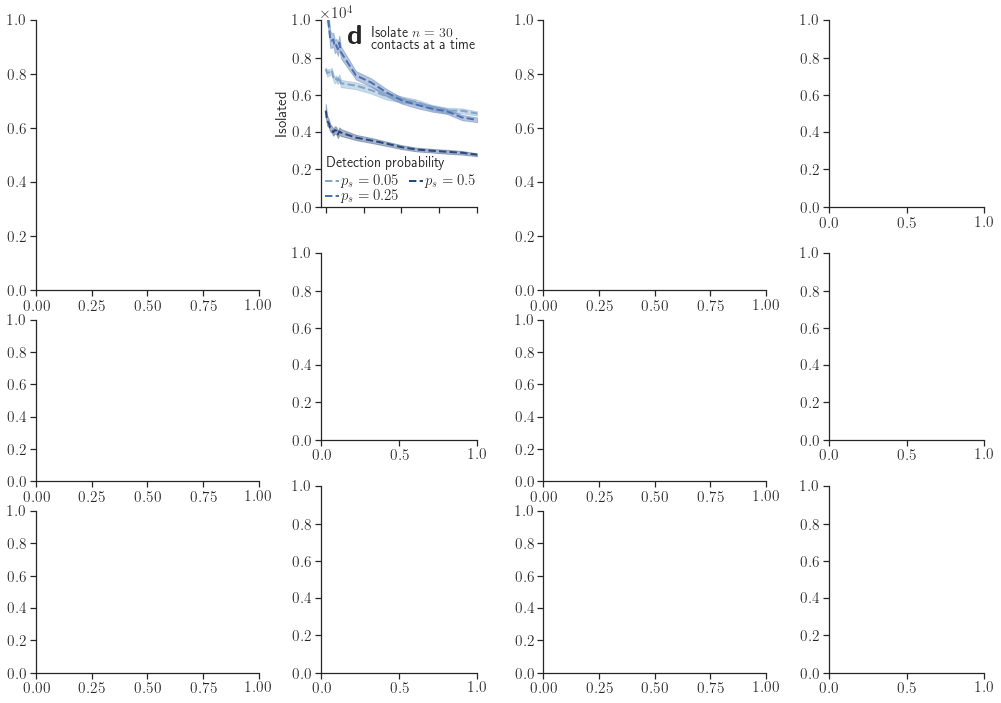

In [10]:
# Plot
def plot_d(ax):
    dtype = "int"
    n = maxnode_list[1]
    ls = linestyles[n]
    utils.plot_ps_vs_i(data_table[dtype]["ps"], ax, plot_params, n, ls=ls)
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_ylabel("Isolated", fontsize=label_font_size)
    formatter = mticker.ScalarFormatter()
    formatter.set_powerlimits((-3, 2))
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylim(0, 1.0 * 1e4)
    ax.set_xlim(-0.03, 1)
    ax.legend(
        frameon=False,
        handlelength=0.9,
        loc="lower left",
        fontsize=15,
        ncol=2,
        bbox_to_anchor=(-0.06, -0.06),
        labelspacing=0,
        columnspacing=0.7,
        handletextpad=0.1,
    )
    ax.annotate(
        r"\noindent Detection probability",
        xy=(0.04, 0.2),
        xycoords="axes fraction",
        ha="left",
        va="bottom",
        fontsize=14,
    )

    ax.annotate(
        r"\noindent Isolate $n = %d$\\contacts at a time" % n,
        xy=(0.99, 0.95),
        xycoords="axes fraction",
        ha="right",
        va="top",
        fontsize=14,
    )
    ax.annotate(r"\textbf{d}", xy=(0.17, 0.98), **subcap_params)


fig, axes = set_layout()
test_plotter(plot_d, axes["int"]["ps_vs_i"])

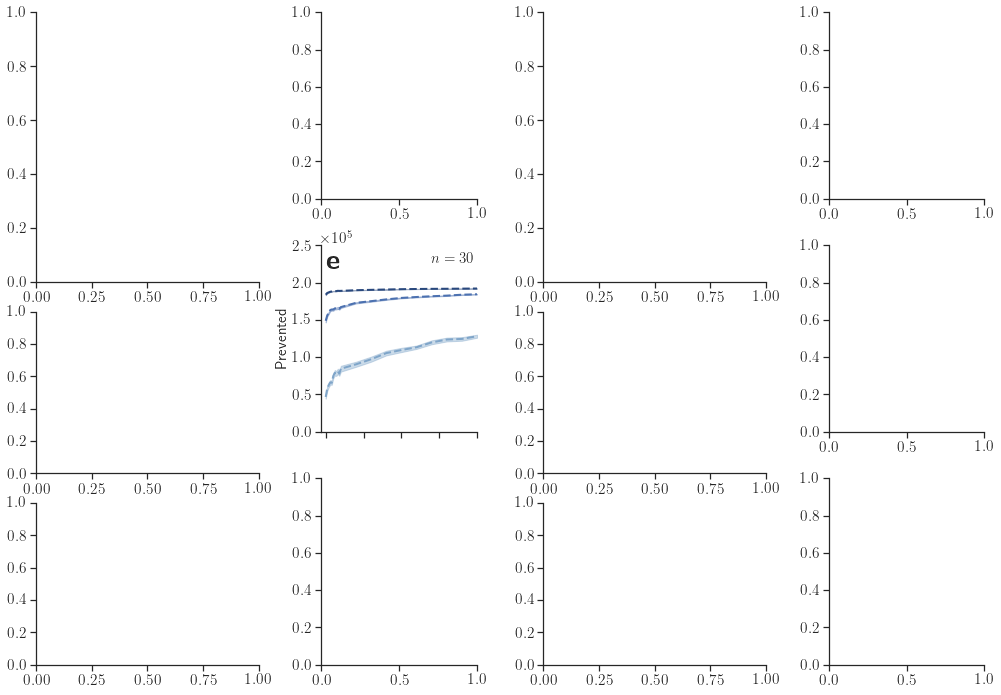

In [11]:
def plot_e(ax):
    dtype = "int"
    n = maxnode_list[1]
    ls = linestyles[n]
    utils.plot_ps_vs_p(data_table[dtype]["ps"], ax, plot_params, n, ls=ls)
    ax.legend(frameon=False).remove()
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_ylabel("Prevented", fontsize=label_font_size)
    formatter = mticker.ScalarFormatter()
    formatter.set_powerlimits((-3, 2))
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xlim(-0.03, 1)
    ax.set_ylim(0, 2.5 * 1e5)
    ax.annotate(
        "$n = %d$" % n,
        xy=(0.98, 0.96),
        xycoords="axes fraction",
        ha="right",
        va="top",
        fontsize=15,
    )
    ax.annotate(r"\textbf{e}", xy=(0.03, 0.98), **subcap_params)


fig, axes = set_layout()
test_plotter(plot_e, axes["int"]["ps_vs_p"])

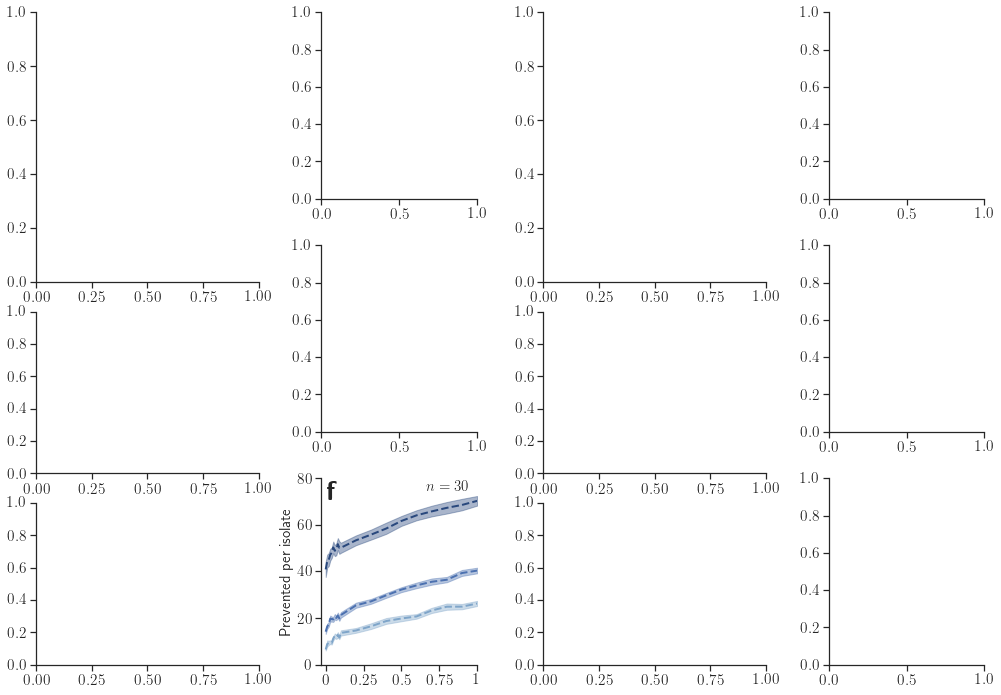

In [12]:
def plot_f(ax):
    dtype = "int"
    n = maxnode_list[1]
    ls = linestyles[n]
    utils.plot_ps_vs_e(data_table[dtype]["ps"], ax, plot_params, n, ls=ls)
    ax.legend().remove()
    ax.set_xlabel("")
    ax.set_ylabel("Prevented per isolate", fontsize=label_font_size)
    ax.set_ylim(0, 80)
    ax.set_xlim(-0.03, 1)
    ax.annotate(
        "$n = %d$" % n,
        xy=(0.95, 0.99),
        xycoords="axes fraction",
        ha="right",
        va="top",
        fontsize=15,
    )

    ax.annotate(r"\textbf{f}", xy=(0.03, 0.99), **subcap_params)


fig, axes = set_layout()
test_plotter(plot_f, axes["int"]["ps_vs_e"])

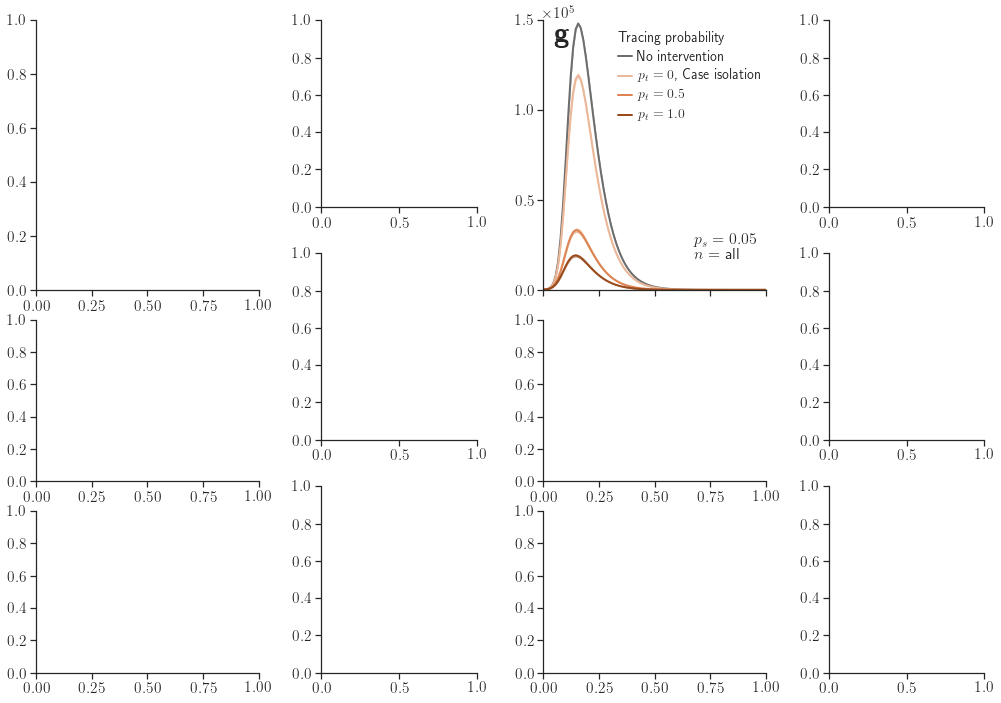

In [13]:
def plot_g(ax):
    dtype = "intb"
    utils.plot_time_vs_i(data_table[dtype]["time"], ax, plot_params, maxnode_list[-1])
    ax.legend().remove()
    lines = ax.get_lines()
    leg = axes["intb"]["t_vs_i"].legend(
        [lines[0]] + lines[1:],
        ["No intervention"]
        + [r"$p_t = 0$, Case isolation", "$p_t = 0.5$", "$p_t = 1.0$"],
        title="Tracing probability",
        frameon=False,
        loc="upper right",
        bbox_to_anchor=(1.03, 1.01),
        fontsize=14,
        handlelength=1,
        labelspacing=0.4,
        handletextpad=0.4,
    )
    leg.get_title().set_fontsize(14)
    leg._legend_box.align = "left"

    yticks = np.array([0, 0.5, 1.0, 1.5]) * 1e5
    ax.set(yticks=yticks)
    ax.set_xlabel("")
    ax.set_xticklabels([])
    formatter = mticker.ScalarFormatter()
    formatter.set_powerlimits((-3, 2))
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylabel("")
    ax.set_xlim(left=0, right=80)
    ax.set_ylim(0, 1.5e5)

    ax.annotate(
        # "$p_s=%.1f$" % 0.1,
        r"\noindent$p_s = 0.05$\\$n=$ all",
        xy=(0.95, 0.2),
        xycoords="axes fraction",
        ha="right",
        va="top",
        fontsize=16,
    )
    ylocs = ax.get_yticks()
    ax.annotate(r"\textbf{g}", xy=(0.05, 0.99), **subcap_params)


fig, axes = set_layout()
test_plotter(plot_g, axes["intb"]["t_vs_i"])

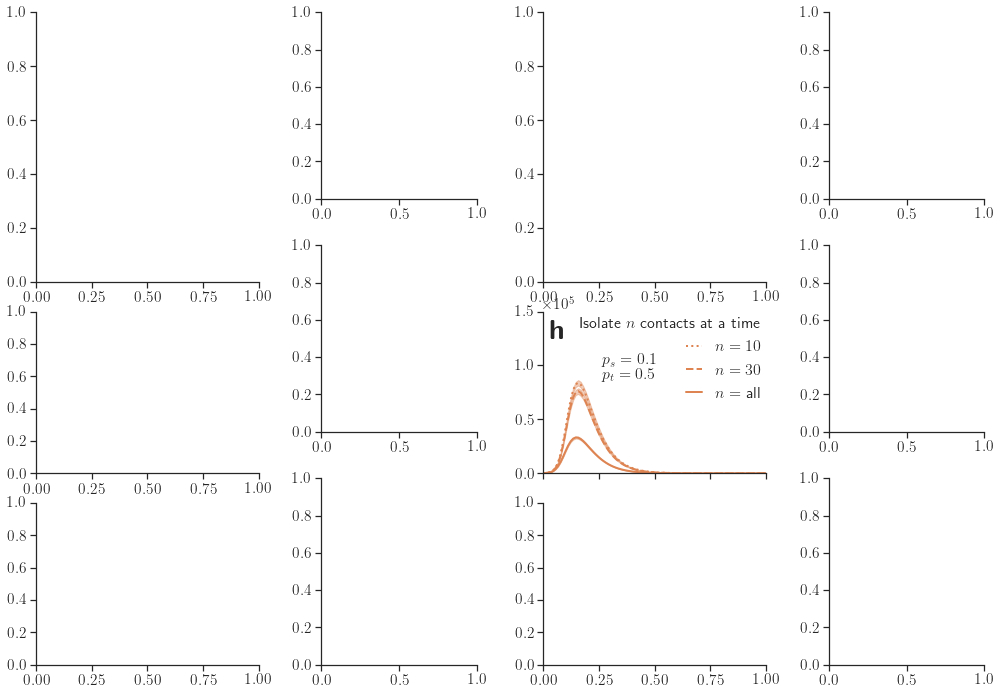

In [14]:
def plot_h(ax):
    dtype = "intb"
    utils.plot_time_vs_i_maxnode(
        data_table[dtype]["time"], ax, plot_params, maxnode_list, linestyles,
    )

    ax.set_ylabel("")
    ax.set_xlabel("")
    # ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xlim(left=0, right=80)
    ax.set_ylim(0, 1.5e5)
    # ax.set_yticks(ylocs)
    formatter = mticker.ScalarFormatter()
    formatter.set_powerlimits((-3, 2))
    ax.yaxis.set_major_formatter(formatter)

    leg = ax.legend(
        frameon=False,
        fontsize=16,
        title="Isolate $n$ contacts at a time",
        loc="upper right",
        bbox_to_anchor=(1.04, 1.06),
        handlelength=1,
    )
    leg._legend_box.align = "right"
    leg.get_title().set_fontsize(16)
    ax.annotate(
        r"\noindent$p_s = 0.1$\\$p_t = 0.5$",
        xy=(0.26, 0.55),
        xycoords="axes fraction",
        ha="left",
        va="bottom",
        fontsize=16,
    )
    ax.annotate(r"\textbf{h}", xy=(0.03, 0.95), **subcap_params)


fig, axes = set_layout()
test_plotter(plot_h, axes["intb"]["t_vs_i_ct"])

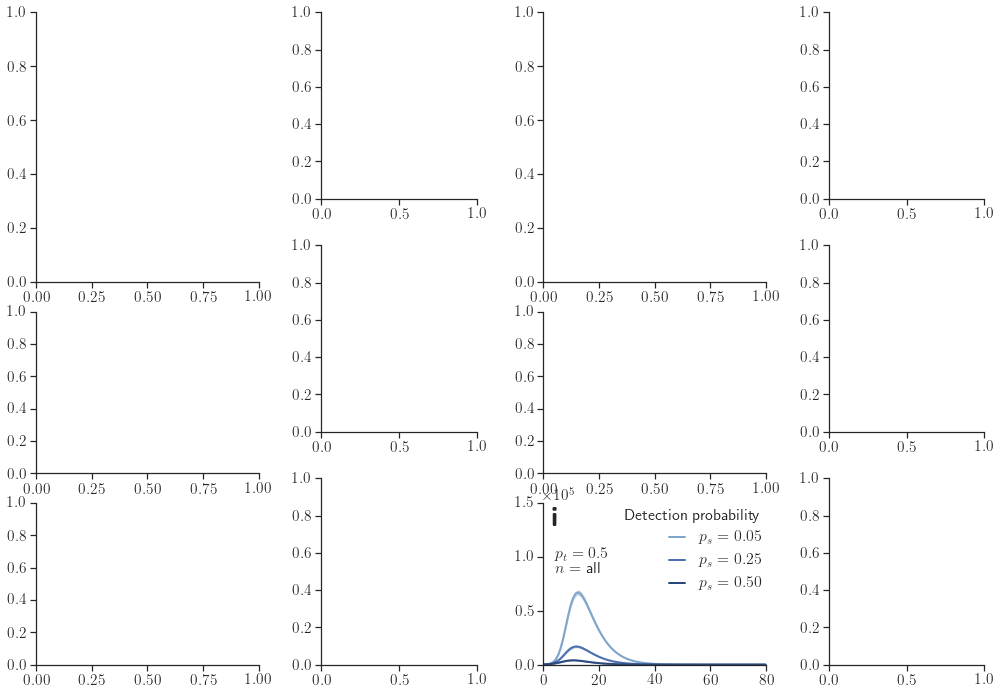

In [15]:
def plot_i(ax):
    dtype = "intb"
    utils.plot_time_vs_i_ps(
        data_table[dtype]["time"], ax, plot_params,
    )

    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_yticklabels([])
    ax.set_xlim(left=0, right=80)
    ax.set_ylim(0, 1.5e5)
    formatter = mticker.ScalarFormatter()
    formatter.set_powerlimits((-3, 2))
    ax.yaxis.set_major_formatter(formatter)
    ax.annotate(
        # "$p_t = 0.5$",
        r"\noindent $p_t = 0.5$\\$n=$ all",
        xy=(0.05, 0.55),
        xycoords="axes fraction",
        ha="left",
        va="bottom",
        fontsize=16,
    )
    leg = axes["intb"]["t_vs_i_ps"].legend(
        frameon=False,
        fontsize=16,
        title="Detection probability",
        loc="upper right",
        handlelength=1,
        bbox_to_anchor=(1.04, 1.06),
    )
    leg._legend_box.align = "right"
    leg.get_title().set_fontsize(16)

    ax.annotate(r"\textbf{i}", xy=(0.04, 0.98), **subcap_params)


fig, axes = set_layout()
test_plotter(plot_i, axes["intb"]["t_vs_i_ps"])

[10, 30, 99999999]


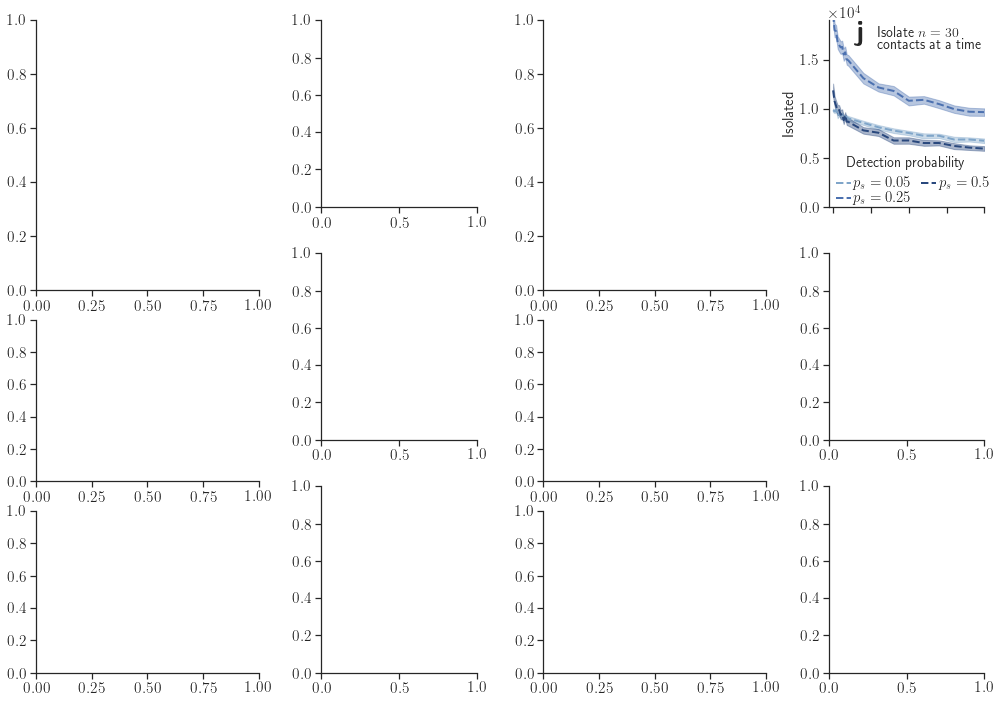

In [16]:
def plot_j(ax):
    dtype = "intb"
    n = maxnode_list[1]
    ls = linestyles[n]
    utils.plot_ps_vs_i(data_table[dtype]["ps"], ax, plot_params, n, ls=ls)

    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_ylabel("Isolated", fontsize=label_font_size)
    formatter = mticker.ScalarFormatter()
    formatter.set_powerlimits((-3, 2))
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xlim(-0.03, 1)
    ax.set_ylim(0, 1.9 * 1e4)
    print(maxnode_list)
    ax.legend(
        frameon=False,
        handlelength=1,
        loc="lower left",
        fontsize=15,
        ncol=2,
        bbox_to_anchor=(-0.04, -0.07),
        labelspacing=0,
        columnspacing=0.7,
        handletextpad=0.1,
    )
    ax.annotate(
        r"\noindent Detection probability",
        xy=(0.5, 0.20),
        xycoords="axes fraction",
        ha="center",
        va="bottom",
        fontsize=14,
    )
    ax.annotate(
        r"\noindent Isolate $n = %d$\\contacts at a time" % n,
        xy=(0.98, 0.95),
        xycoords="axes fraction",
        ha="right",
        va="top",
        fontsize=14,
    )
    ax.annotate(r"\textbf{j}", xy=(0.16, 1), **subcap_params)


fig, axes = set_layout()
test_plotter(plot_j, axes["intb"]["ps_vs_i"])

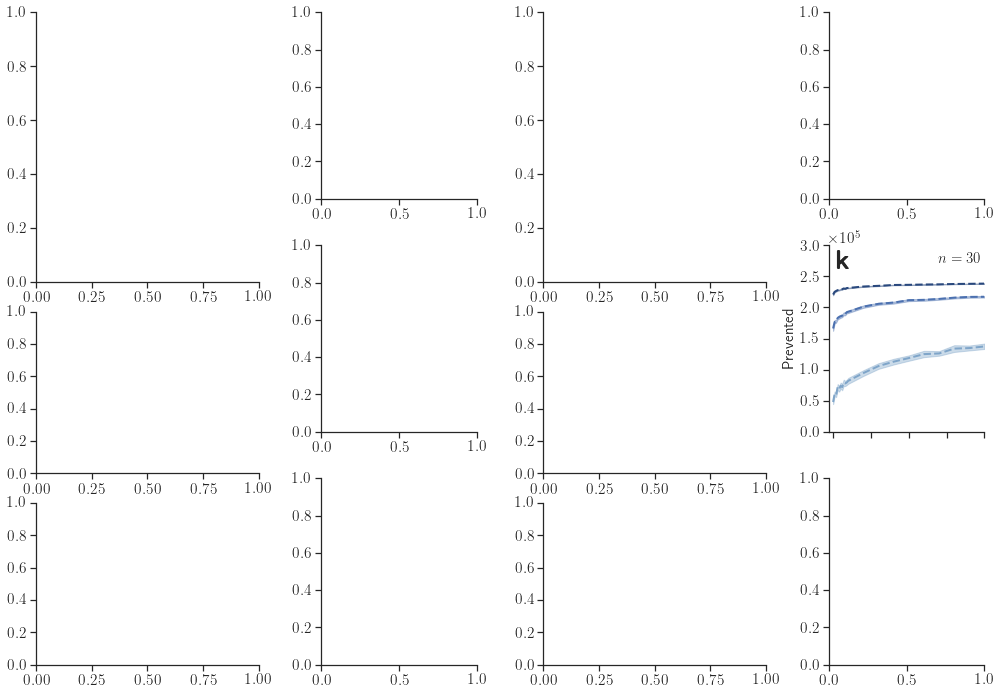

In [17]:
def plot_k(ax):
    dtype = "intb"
    n = maxnode_list[1]
    ls = linestyles[n]
    utils.plot_ps_vs_p(data_table[dtype]["ps"], ax, plot_params, n, ls=ls)

    ax.legend(frameon=False).remove()
    ax.set_xlabel("")
    ax.set_xticklabels([])
    ax.set_ylabel("Prevented", fontsize=label_font_size)
    formatter = mticker.ScalarFormatter()
    formatter.set_powerlimits((-3, 2))
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xlim(-0.03, 1.0)
    ax.set_ylim(0, 3.0 * 1e5)
    ax.annotate(
        "$n = %d$" % n,
        xy=(0.98, 0.96),
        xycoords="axes fraction",
        ha="right",
        va="top",
        fontsize=15,
    )

    ax.annotate(r"\textbf{k}", xy=(0.05, 0.98), **subcap_params)


fig, axes = set_layout()
test_plotter(plot_k, axes["intb"]["ps_vs_p"])

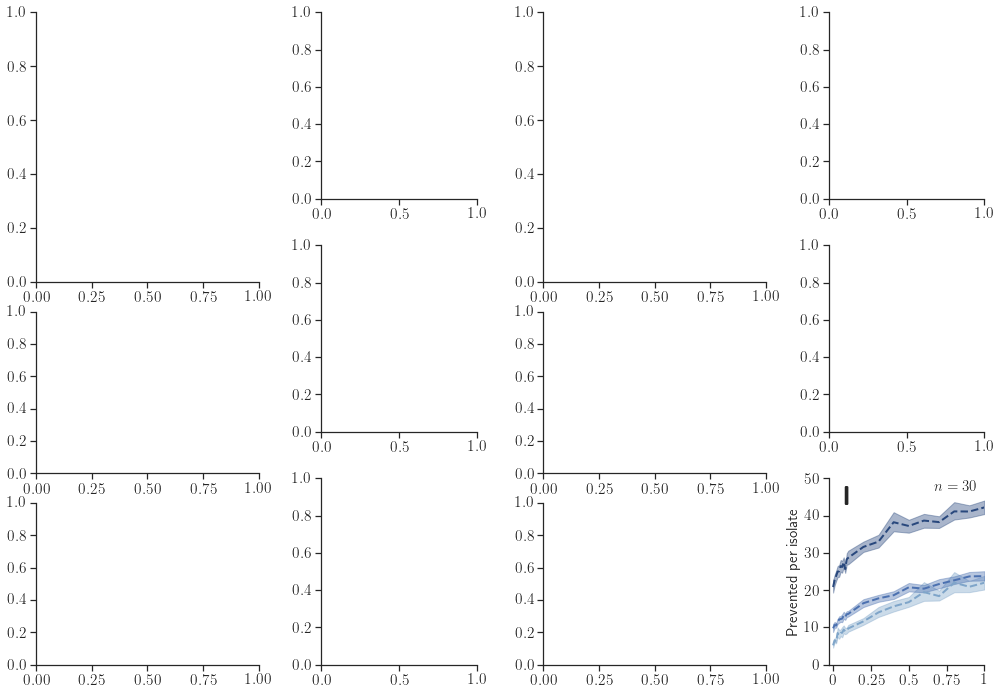

In [18]:
def plot_l(ax):
    dtype = "intb"
    n = maxnode_list[1]
    ls = linestyles[n]
    utils.plot_ps_vs_e(data_table[dtype]["ps"], ax, plot_params, n, ls=ls)

    ax.legend(frameon=False).remove()
    ax.set_xlabel("")
    ax.set_ylabel("Prevented per isolate", fontsize=label_font_size)
    ax.set_xlim(-0.03, 1)
    ax.set_ylim(0, 50)
    ax.annotate(
        "$n = %d$" % n,
        xy=(0.95, 0.99),
        xycoords="axes fraction",
        ha="right",
        va="top",
        fontsize=15,
    )

    ax.annotate(r"\textbf{l}", xy=(0.1, 0.96), **subcap_params)


fig, axes = set_layout()
test_plotter(plot_l, axes["intb"]["ps_vs_e"])

[10, 30, 99999999]


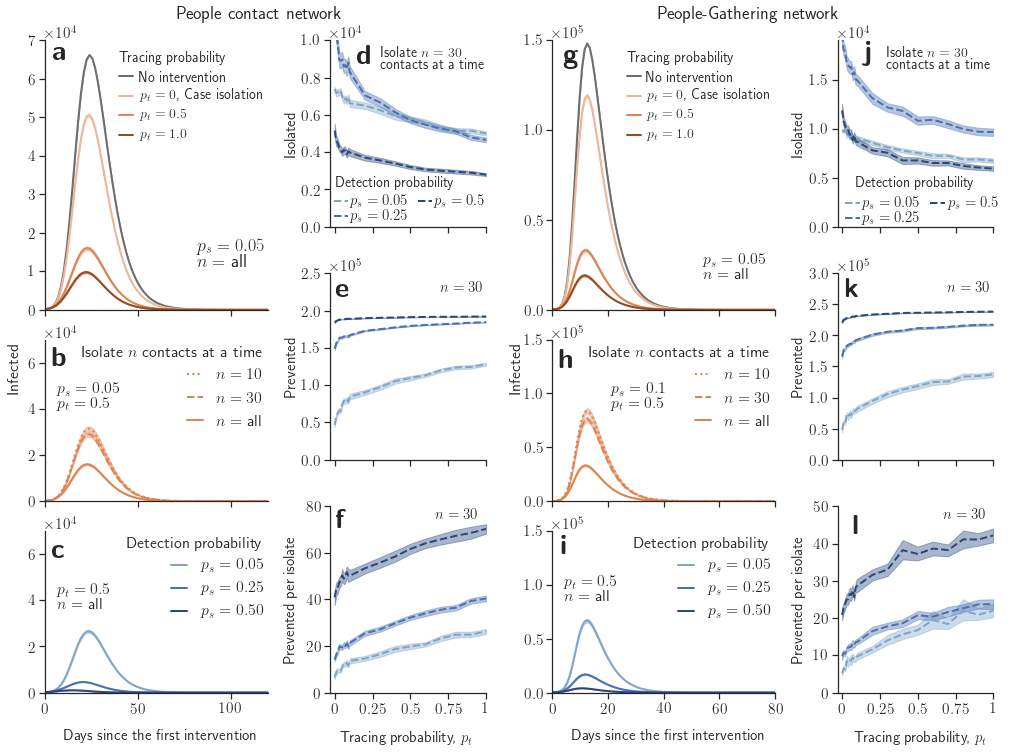

In [19]:
rc("text", usetex=True)

sns.set_style("white")
sns.set(font_scale=1.4)
sns.set_style("ticks")

fig, axes = set_layout()

plot_a(axes["int"]["t_vs_i"])
plot_b(axes["int"]["t_vs_i_ct"])
plot_c(axes["int"]["t_vs_i_ps"])
plot_d(axes["int"]["ps_vs_i"])
plot_e(axes["int"]["ps_vs_p"])
plot_f(axes["int"]["ps_vs_e"])

plot_g(axes["intb"]["t_vs_i"])
plot_h(axes["intb"]["t_vs_i_ct"])
plot_i(axes["intb"]["t_vs_i_ps"])
plot_j(axes["intb"]["ps_vs_i"])
plot_k(axes["intb"]["ps_vs_p"])
plot_l(axes["intb"]["ps_vs_e"])

# Align labels
fig.align_ylabels(
    [axes["int"]["ps_vs_i"], axes["int"]["ps_vs_p"], axes["int"]["ps_vs_e"]]
)
fig.align_ylabels(
    [axes["intb"]["ps_vs_i"], axes["intb"]["ps_vs_p"], axes["intb"]["ps_vs_e"]]
)

fig.text(
    0.42,
    0.07,
    "Tracing probability, $p_t$",
    ha="center",
    va="center",
    fontsize=label_font_size,
)
fig.text(
    0.22,
    0.075,
    "Days since the first intervention",
    ha="center",
    va="center",
    fontsize=label_font_size,
)

fig.text(
    0.42 + 0.42,
    0.07,
    "Tracing probability, $p_t$",
    ha="center",
    va="center",
    fontsize=label_font_size,
)
fig.text(
    0.215 + 0.42,
    0.075,
    "Days since the first intervention",
    ha="center",
    va="center",
    fontsize=label_font_size,
)

fig.text(
    0.3, 0.91, "People contact network", ha="center", va="center", fontsize=18,
)
fig.text(
    0.7, 0.91, "People-Gathering network", ha="center", va="center", fontsize=18,
)

fig.text(
    0.1, 0.5, "Infected", ha="center", va="center", fontsize=16, rotation=90,
)

fig.text(
    0.51, 0.5, "Infected", ha="center", va="center", fontsize=16, rotation=90,
)
sns.despine()
fig.savefig("../../figs/int-intb-result.pdf", bbox_inches="tight", dpi=300)